# 🧬 Yeast Cell Cycle Analysis - Essential Version

**Streamlined notebook using MATLAB extension for macOS**  
**Model**: Kraikivski et al. 2015 - Budding Yeast Cell Cycle  

---

## 📦 Setup & Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import find_peaks
import os

# Set working directory and configure plotting
os.chdir('/Users/gijsbartholomeus/Documents/STUDIE/OxfordEvolution/Code')
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

print(f"✅ Working directory: {os.getcwd()}")
print("✅ Libraries imported successfully")

✅ Working directory: /Users/gijsbartholomeus/Documents/STUDIE/OxfordEvolution/code
✅ Libraries imported successfully


## 🧪 Test & Run MATLAB Simulation

First test MATLAB connectivity with `test_matlab.m`, then run the full simulation using proper MATLAB flags:
`matlab -nodisplay -nosplash -nodesktop -batch`

In [5]:
import subprocess
import os

def run_matlab_with_flags(script_name):
    """Run MATLAB script with proper flags for headless execution"""
    try:
        print(f"🔄 Testing MATLAB with {script_name}...")
        
        # Use the proper MATLAB flags from your documentation
        result = subprocess.run(
            ['matlab', '-nodisplay', '-nosplash', '-nodesktop', '-batch', f"run('{script_name.replace('.m', '')}')"],
            capture_output=True, text=True, timeout=120, cwd=os.getcwd()
        )
        
        if result.returncode == 0:
            print(f"✅ {script_name} executed successfully!")
            if result.stdout:
                print("MATLAB Output:")
                print(result.stdout[-500:])  # Last 500 chars
            return True
        else:
            print(f"❌ {script_name} failed:")
            print("STDOUT:", result.stdout)
            print("STDERR:", result.stderr)
            return False
            
    except subprocess.TimeoutExpired:
        print(f"⏰ {script_name} timed out after 2 minutes")
        return False
    except Exception as e:
        print(f"❌ Error running {script_name}: {e}")
        return False

# Step 1: Test MATLAB with simple test file
print("🧪 Step 1: Testing MATLAB connectivity...")
test_success = run_matlab_with_flags("test_matlab.m")

if test_success:
    print("\n🎉 MATLAB test passed! Proceeding to main simulation...")
    
    # Step 2: Run the main yeast model
    print("\n🧬 Step 2: Running yeast cell cycle simulation...")
    main_success = run_matlab_with_flags("run_yeast_model.m")
    
    if main_success:
        print("\n✅ Simulation completed successfully!")
        print("\n📁 Checking generated files...")
        
        expected_files = ['matlab_results.mat', 'time_data.csv', 'species_names.txt', 'species_concentrations.csv']
        for file in expected_files:
            if os.path.exists(file):
                size = os.path.getsize(file)
                print(f"   ✅ {file} ({size} bytes)")
            else:
                print(f"   ❌ {file} not found")
        
        simulation_success = True
    else:
        print("\n⚠️ Main simulation failed, but we can try with existing data files")
        simulation_success = False
        
else:
    print("\n❌ MATLAB test failed. Please check:")
    print("   • MATLAB is installed and in PATH")
    print("   • test_matlab.m exists in current directory")
    print("   • MATLAB license is active")
    simulation_success = False

print(f"\n📊 Status: Test={'✅' if test_success else '❌'}, Simulation={'✅' if simulation_success else '❌'}")

🧪 Step 1: Testing MATLAB connectivity...
🔄 Testing MATLAB with test_matlab.m...
✅ test_matlab.m executed successfully!
MATLAB Output:
written to test_data.csv
Test data read back successfully
Data size: 2x10

--- Directory Test ---
MATLAB files in current directory:
  BuddingYeastCellCycle_2015.m
  BuddingYeastCellCycle_2015_backup.m
  run_yeast_model.m
  run_yeast_model_linux.m
  test_matlab.m

--- Key Files Check ---
✓ BuddingYeastCellCycle_2015.m exists
✓ run_yeast_model.m exists

--- System Info ---
Memory info not available on this system

=== MATLAB Test Completed Successfully ===
Test completed at: 29-Sep-2025 15:30:21


🎉 MATLAB test passed! Proceeding to main simulation...

🧬 Step 2: Running yeast cell cycle simulation...
🔄 Testing MATLAB with run_yeast_model.m...
✅ run_yeast_model.m executed successfully!
MATLAB Output:
timated cell cycle period (simple method): 48.5 ± 3.8 time units
Number of cycles detected: 5

Final concentrations of key regulators:
  CLN2: 1.229
  CLB2: 0

## 📊 Load Data & Find Key Species

In [6]:
# Load simulation data
print("📂 Loading simulation data...")

# Load from MATLAB file
mat_data = sio.loadmat('matlab_results.mat')
time = mat_data['T'].flatten()
concentrations = mat_data['allValues']
species_names = [name[0] for name in mat_data['allNames'].flatten()]

print(f"✅ Loaded {len(time)} time points, {len(species_names)} species")
print(f"   Time range: {time[0]:.1f} to {time[-1]:.1f}")
print(f"   Data shape: {concentrations.shape}")

# Create DataFrame
df_dict = {'Time': time}
for i, name in enumerate(species_names[:concentrations.shape[1]]):
    df_dict[name] = concentrations[:, i]

df = pd.DataFrame(df_dict)
print(f"✅ Created DataFrame: {df.shape}")

# Find key cell cycle species
key_species = {}
patterns = {
    'CLN2': 'CLN2',     # G1/S cyclin
    'CLB2': 'CLB2T',    # G2/M cyclin (total)
    'SIC1': 'CKIT',     # CDK inhibitor
    'CDC20': 'CDC20T',  # APC activator
    'CDH1': 'CDH1A',    # APC activator
}

print("\n🔍 Key species found:")
for species, pattern in patterns.items():
    if pattern in df.columns:
        key_species[species] = pattern
        values = df[pattern]
        print(f"   ✅ {species:5} ({pattern:8}): range {values.min():.3f} - {values.max():.3f}")
    else:
        print(f"   ❌ {species} not found")

print(f"\n📈 Ready for analysis with {len(key_species)} key species")

📂 Loading simulation data...
✅ Loaded 1904 time points, 150 species
   Time range: 0.0 to 300.0
   Data shape: (1904, 150)
✅ Created DataFrame: (1904, 151)

🔍 Key species found:
   ✅ CLN2  (CLN2    ): range 0.025 - 1.477
   ✅ CLB2  (CLB2T   ): range 0.004 - 0.529
   ✅ SIC1  (CKIT    ): range 0.003 - 0.139
   ✅ CDC20 (CDC20T  ): range 0.003 - 0.605
   ✅ CDH1  (CDH1A   ): range -0.000 - 0.999

📈 Ready for analysis with 5 key species


## 📈 Create Essential Visualizations

/var/folders/dg/j3xfsm6j68s_0jk_l6mqmh_h0000gn/T/ipykernel_87738/598546676.py:79: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/gijsbartholomeus/.local/share/mamba/envs/bioevo/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


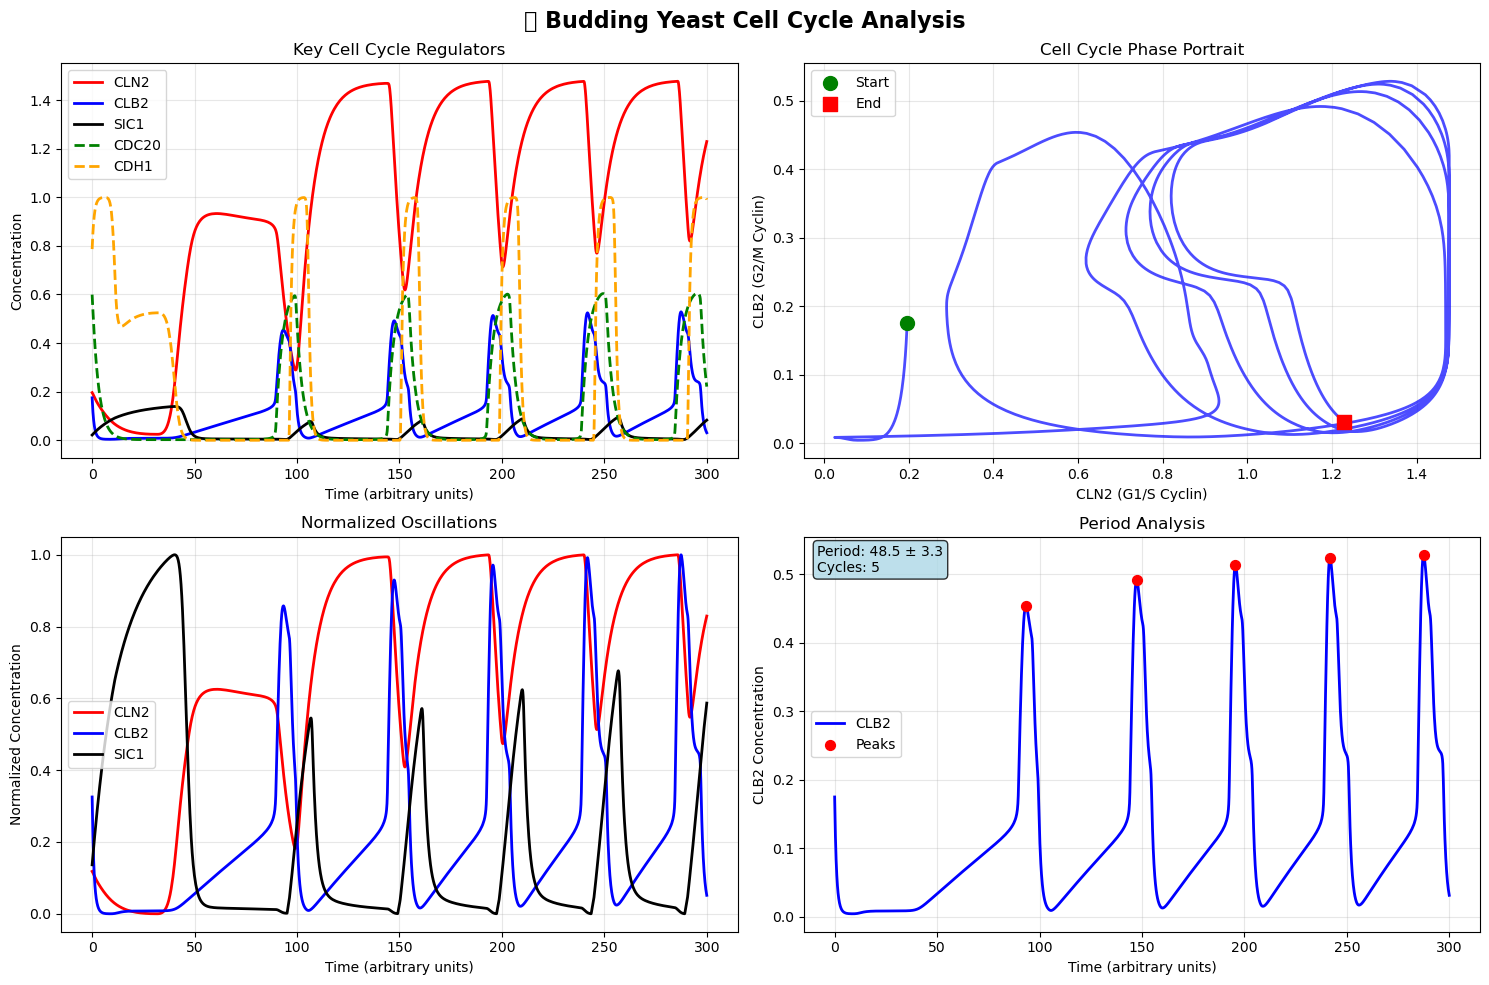


✅ Visualization complete!


In [7]:
# Create comprehensive cell cycle analysis plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🧬 Budding Yeast Cell Cycle Analysis', fontsize=16, fontweight='bold')

colors = {'CLN2': 'red', 'CLB2': 'blue', 'SIC1': 'black', 'CDC20': 'green', 'CDH1': 'orange'}

# Plot 1: Time series of key regulators
ax1 = axes[0, 0]
for species, column in key_species.items():
    color = colors.get(species, 'gray')
    linestyle = '--' if species in ['CDC20', 'CDH1'] else '-'
    ax1.plot(df['Time'], df[column], color=color, linewidth=2, 
             linestyle=linestyle, label=species)

ax1.set_xlabel('Time (arbitrary units)')
ax1.set_ylabel('Concentration')
ax1.set_title('Key Cell Cycle Regulators')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Phase portrait (CLN2 vs CLB2)
ax2 = axes[0, 1]
if 'CLN2' in key_species and 'CLB2' in key_species:
    x = df[key_species['CLN2']]
    y = df[key_species['CLB2']]
    ax2.plot(x, y, 'blue', linewidth=2, alpha=0.7)
    ax2.scatter(x.iloc[0], y.iloc[0], color='green', s=100, marker='o', 
                label='Start', zorder=5)
    ax2.scatter(x.iloc[-1], y.iloc[-1], color='red', s=100, marker='s', 
                label='End', zorder=5)
    ax2.set_xlabel(f'CLN2 (G1/S Cyclin)')
    ax2.set_ylabel(f'CLB2 (G2/M Cyclin)')
    ax2.set_title('Cell Cycle Phase Portrait')
    ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Normalized oscillations
ax3 = axes[1, 0]
for species, column in key_species.items():
    if species in ['CLN2', 'CLB2', 'SIC1']:  # Focus on main cyclins
        values = df[column]
        normalized = (values - values.min()) / (values.max() - values.min())
        color = colors.get(species, 'gray')
        ax3.plot(df['Time'], normalized, color=color, linewidth=2, label=f'{species}')

ax3.set_xlabel('Time (arbitrary units)')
ax3.set_ylabel('Normalized Concentration')
ax3.set_title('Normalized Oscillations')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Period analysis
ax4 = axes[1, 1]
if 'CLB2' in key_species:
    clb2_values = df[key_species['CLB2']].values
    ax4.plot(df['Time'], clb2_values, 'blue', linewidth=2, label='CLB2')
    
    # Find peaks for period analysis
    peaks, _ = find_peaks(clb2_values, height=np.max(clb2_values)*0.5, distance=20)
    if len(peaks) > 1:
        ax4.scatter(df['Time'].iloc[peaks], clb2_values[peaks], 
                   color='red', s=50, marker='o', label='Peaks', zorder=5)
        
        # Calculate average period
        periods = np.diff(df['Time'].iloc[peaks])
        avg_period = np.mean(periods)
        std_period = np.std(periods)
        
        ax4.text(0.02, 0.98, f'Period: {avg_period:.1f} ± {std_period:.1f}\nCycles: {len(peaks)}', 
                transform=ax4.transAxes, va='top', ha='left',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

ax4.set_xlabel('Time (arbitrary units)')
ax4.set_ylabel('CLB2 Concentration')
ax4.set_title('Period Analysis')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")

## 🔬 Quick Analysis Summary

In [8]:
# Calculate key metrics
print("🔬 CELL CYCLE ANALYSIS SUMMARY")
print("=" * 50)

# Overall simulation info
print(f"📊 Simulation Overview:")
print(f"   Time span: {time[0]:.1f} to {time[-1]:.1f} time units")
print(f"   Data points: {len(time)}")
print(f"   Species monitored: {len(species_names)}")

# Period analysis for CLB2
if 'CLB2' in key_species:
    clb2_data = df[key_species['CLB2']].values
    peaks, _ = find_peaks(clb2_data, height=np.max(clb2_data)*0.5, distance=20)
    
    if len(peaks) > 1:
        periods = np.diff(time[peaks])
        avg_period = np.mean(periods)
        n_cycles = time[-1] / avg_period
        
        print(f"\n🔄 Cell Cycle Dynamics:")
        print(f"   Average period: {avg_period:.1f} ± {np.std(periods):.1f} time units")
        print(f"   Complete cycles: {len(peaks)}")
        print(f"   Total cycles simulated: ~{n_cycles:.1f}")

# Final concentrations
print(f"\n🎯 Final Concentrations:")
for species, column in key_species.items():
    final_val = df[column].iloc[-1]
    max_val = df[column].max()
    percent = (final_val / max_val) * 100
    print(f"   {species:5}: {final_val:.3f} ({percent:.1f}% of max)")

# Export essential data
essential_data = df[['Time'] + list(key_species.values())]
essential_data.to_csv('essential_yeast_data.csv', index=False)

print(f"\n💾 Essential data exported to 'essential_yeast_data.csv'")
print(f"\n✅ Analysis complete!")

🔬 CELL CYCLE ANALYSIS SUMMARY
📊 Simulation Overview:
   Time span: 0.0 to 300.0 time units
   Data points: 1904
   Species monitored: 150

🔄 Cell Cycle Dynamics:
   Average period: 48.5 ± 3.3 time units
   Complete cycles: 5
   Total cycles simulated: ~6.2

🎯 Final Concentrations:
   CLN2 : 1.229 (83.2% of max)
   CLB2 : 0.031 (5.9% of max)
   SIC1 : 0.083 (59.6% of max)
   CDC20: 0.221 (36.5% of max)
   CDH1 : 0.990 (99.1% of max)

💾 Essential data exported to 'essential_yeast_data.csv'

✅ Analysis complete!
